<a href="https://colab.research.google.com/github/ashankk1/325-Midterm/blob/main/Ashank_Karuna_Midterm_Project_325_Spring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [107]:
voters = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv')

##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



The purpose of this project is to analyze to the total registered voters for a set of 12 states in the years 2016 and 2020. The goal is answer which month produces the most number of registered voters in the state with the highest number of registered voters for each year. The project also look to answer to why certain states have a higher number of total registered voters than others.

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [ ]:
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


1. Jurisdiciton refers to the state of the registered voters
2. Year refers to the year of the registration
3. Month refers to the month in which the data for registration was collected
4. New registered voters refers to the number of new registered voters for every month and state

Check for any missing data data. (1 point)

In [ ]:
voters.isnull().values.any()

False

There is no missing data

Check your data types. (1 point)

Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [108]:
voters = voters.rename(columns={"Jurisdiction":"NAME"})
voters = voters.rename(columns={"New registered voters":"registered_voters"})
voters

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


Explain any potential limitations to your data (2 points)

The data could be slightly more specific by including counties and their vote count. Another limitation is

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [ ]:
voters.loc[voters.registered_voters==voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


What is the average voter registration? (1 points)

In [ ]:
voters.registered_voters.mean()

48223.46226415094

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [ ]:
voters["high_voters"] = voters["registered_voters"]>48223.46226415094
voters.loc[voters.high_voters==True]

,NAME,Year,Month,registered_voters,high_voters
1,Arizona,2016,Feb,51155,True
2,Arizona,2016,Mar,48614,True
5,Arizona,2020,Feb,50853,True
8,California,2016,Jan,87574,True
9,California,2016,Feb,103377,True
10,California,2016,Mar,174278,True
11,California,2016,Apr,185478,True
12,California,2020,Jan,151595,True
13,California,2020,Feb,238281,True
14,California,2020,Mar,176810,True


The total number of votes for each state went over the average 36 times.

How many times did each state go above the national average for new voter registration? (2 points)



In [ ]:
voters.loc[voters["NAME"]=="Arizona"].loc[voters["high_voters"]==True]

,NAME,Year,Month,registered_voters,high_voters
1,Arizona,2016,Feb,51155,True
2,Arizona,2016,Mar,48614,True
5,Arizona,2020,Feb,50853,True


In [ ]:
voters.loc[voters["NAME"]=="California"].loc[voters["high_voters"]==True]

,NAME,Year,Month,registered_voters,high_voters
8,California,2016,Jan,87574,True
9,California,2016,Feb,103377,True
10,California,2016,Mar,174278,True
11,California,2016,Apr,185478,True
12,California,2020,Jan,151595,True
13,California,2020,Feb,238281,True
14,California,2020,Mar,176810,True


In [ ]:
voters.loc[voters["NAME"]=="Florida"].loc[voters["high_voters"]==True]

,NAME,Year,Month,registered_voters,high_voters
42,Florida,2016,Jan,50231,True
43,Florida,2016,Feb,87351,True
44,Florida,2016,Mar,73627,True
45,Florida,2016,Apr,52508,True
46,Florida,2020,Jan,77466,True
47,Florida,2020,Feb,109859,True
48,Florida,2020,Mar,54872,True


In [ ]:
voters.loc[voters["NAME"]=="Georgia"].loc[voters["high_voters"]==True]

,NAME,Year,Month,registered_voters,high_voters
55,Georgia,2020,Feb,55386,True


In [ ]:
voters.loc[voters["NAME"]=="Illinois"].loc[voters["high_voters"]==True]

,NAME,Year,Month,registered_voters,high_voters
59,Illinois,2016,Feb,99674,True
60,Illinois,2016,Mar,52782,True
61,Illinois,2016,Apr,76098,True
63,Illinois,2020,Feb,68455,True


In [ ]:
voters.loc[voters["NAME"]=="North Carolina"].loc[voters["high_voters"]==True]

,NAME,Year,Month,registered_voters,high_voters
77,North Carolina,2016,Feb,84357,True
78,North Carolina,2016,Mar,58272,True
79,North Carolina,2016,Apr,73341,True
81,North Carolina,2020,Jan,111990,True
82,North Carolina,2020,Feb,54053,True
83,North Carolina,2020,Mar,54807,True


In [ ]:
voters.loc[voters["NAME"]=="Texas"].loc[voters["high_voters"]==True]

,NAME,Year,Month,registered_voters,high_voters
86,Texas,2016,Jan,132860,True
87,Texas,2016,Feb,143795,True
88,Texas,2016,Mar,170607,True
89,Texas,2016,Apr,143199,True
90,Texas,2016,May,91205,True
91,Texas,2020,Jan,134559,True
92,Texas,2020,Feb,130080,True
93,Texas,2020,Mar,129424,True


Arizona has went above the national average 3 times

California and Florida have each gone above the national average 7 times

Georgia has gone over the national average one time

Illinois has gone over the national average 4 times

North Carolina has gone over the national average 6 times

Texas has gone over the national average 8 times

Deleware, District of Columbia, Colorado, Maryland, and Virginia have never crossed the national average

Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [ ]:
highest_voter_avg = voters.groupby("NAME")["registered_voters"].sum()
highest_voter_avg.sort_values(ascending=False)

,registered_voters
NAME,
California,1156363
Texas,1146101
North Carolina,560408
Florida,526945
Illinois,454723
Georgia,292833
Arizona,282492
Virginia,248452
Maryland,221335


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

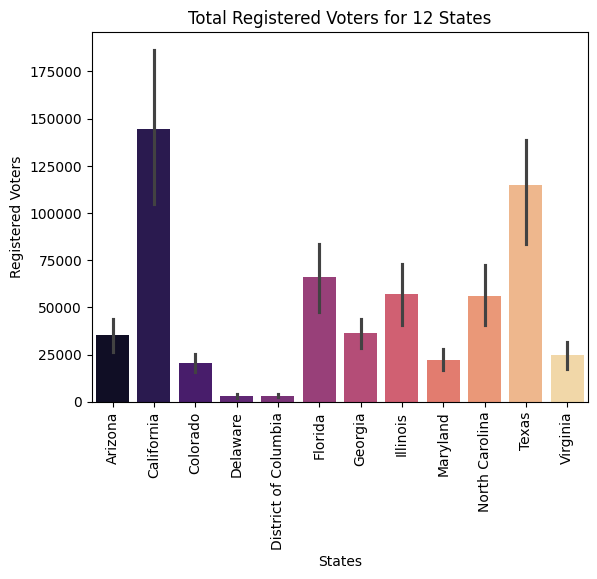

In [ ]:
sns.barplot(voters,x="NAME", y="registered_voters", hue="NAME", palette="magma")
plt.ylabel("Registered Voters")
plt.xlabel("States")
plt.xticks(rotation = 90)
plt.title("Total Registered Voters for 12 States")
plt.show()

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

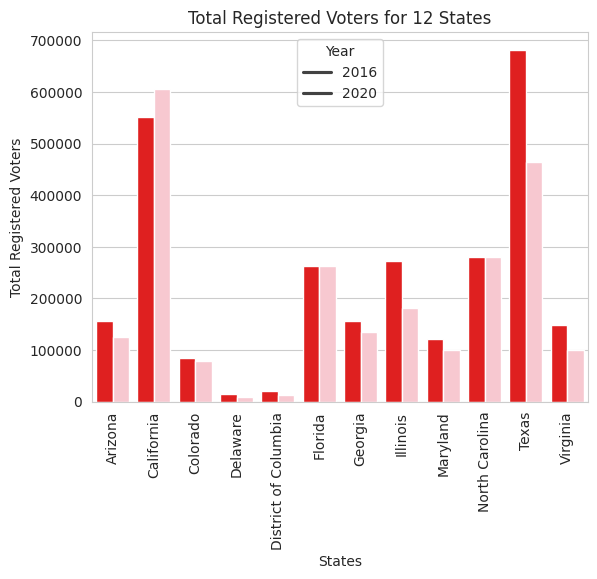

In [ ]:
voters_grouped = voters.groupby(["NAME","Year"])["registered_voters"].sum().reset_index()
sns.barplot(x="NAME", y="registered_voters", hue="Year", data=voters_grouped, palette=["red", "pink"])
legend = plt.legend(labels = {"2016":"red", "2020":"pink"}, title="Year")
plt.ylabel("Total Registered Voters")
plt.xlabel("States")
plt.xticks(rotation = 90)
plt.title("Total Registered Voters for 12 States")
plt.show()

In the year 2016, Texas had the highest total number of newly registered voters. In the year 2020, California had the highest total number of newly registered voters. Deleware had the lowest number of total registered voters for both 2016 and 2017. California is the only state in which the amount of new registered voters increased in 2020.

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

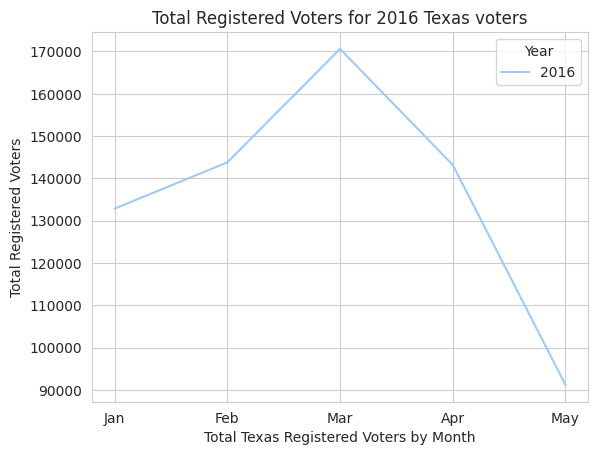

In [ ]:
voters_tx = voters.loc[voters.NAME=="Texas"].loc[voters.Year==2016]
sns.lineplot(x="Month", y="registered_voters", hue="Year", data=voters_tx, palette ="pastel")
plt.ylabel("Total Registered Voters")
plt.xlabel("Total Texas Registered Voters by Month")
plt.title("Total Registered Voters for 2016 Texas voters")
plt.show()

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [ ]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.47 MiB/s, done.
Resolving deltas: 100% (13/13), done.


Set our continental US bounding box to us for the next questions. (2 points)

In [101]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


Create a dataframe that shows the average voter registration per state. (2 points)

In [113]:
avg_registered_voters = voters.groupby("NAME")["registered_voters"].mean()

Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [115]:
merged_data = pd.merge(avg_registered_voters, states, on="NAME", how="inner")
merged_data.head()

,NAME,registered_voters,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry
0,Arizona,35311.500,04,01779777,0400000US04,04,AZ,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
1,California,144545.375,06,01779778,0400000US06,06,CA,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
2,Colorado,20527.500,08,01779779,0400000US08,08,CO,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
3,Delaware,3166.375,10,01779781,0400000US10,10,DE,00,5045925646,1399985648,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ..."
4,District of Columbia,3248.400,11,01702382,0400000US11,11,DC,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940..."


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

In [117]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

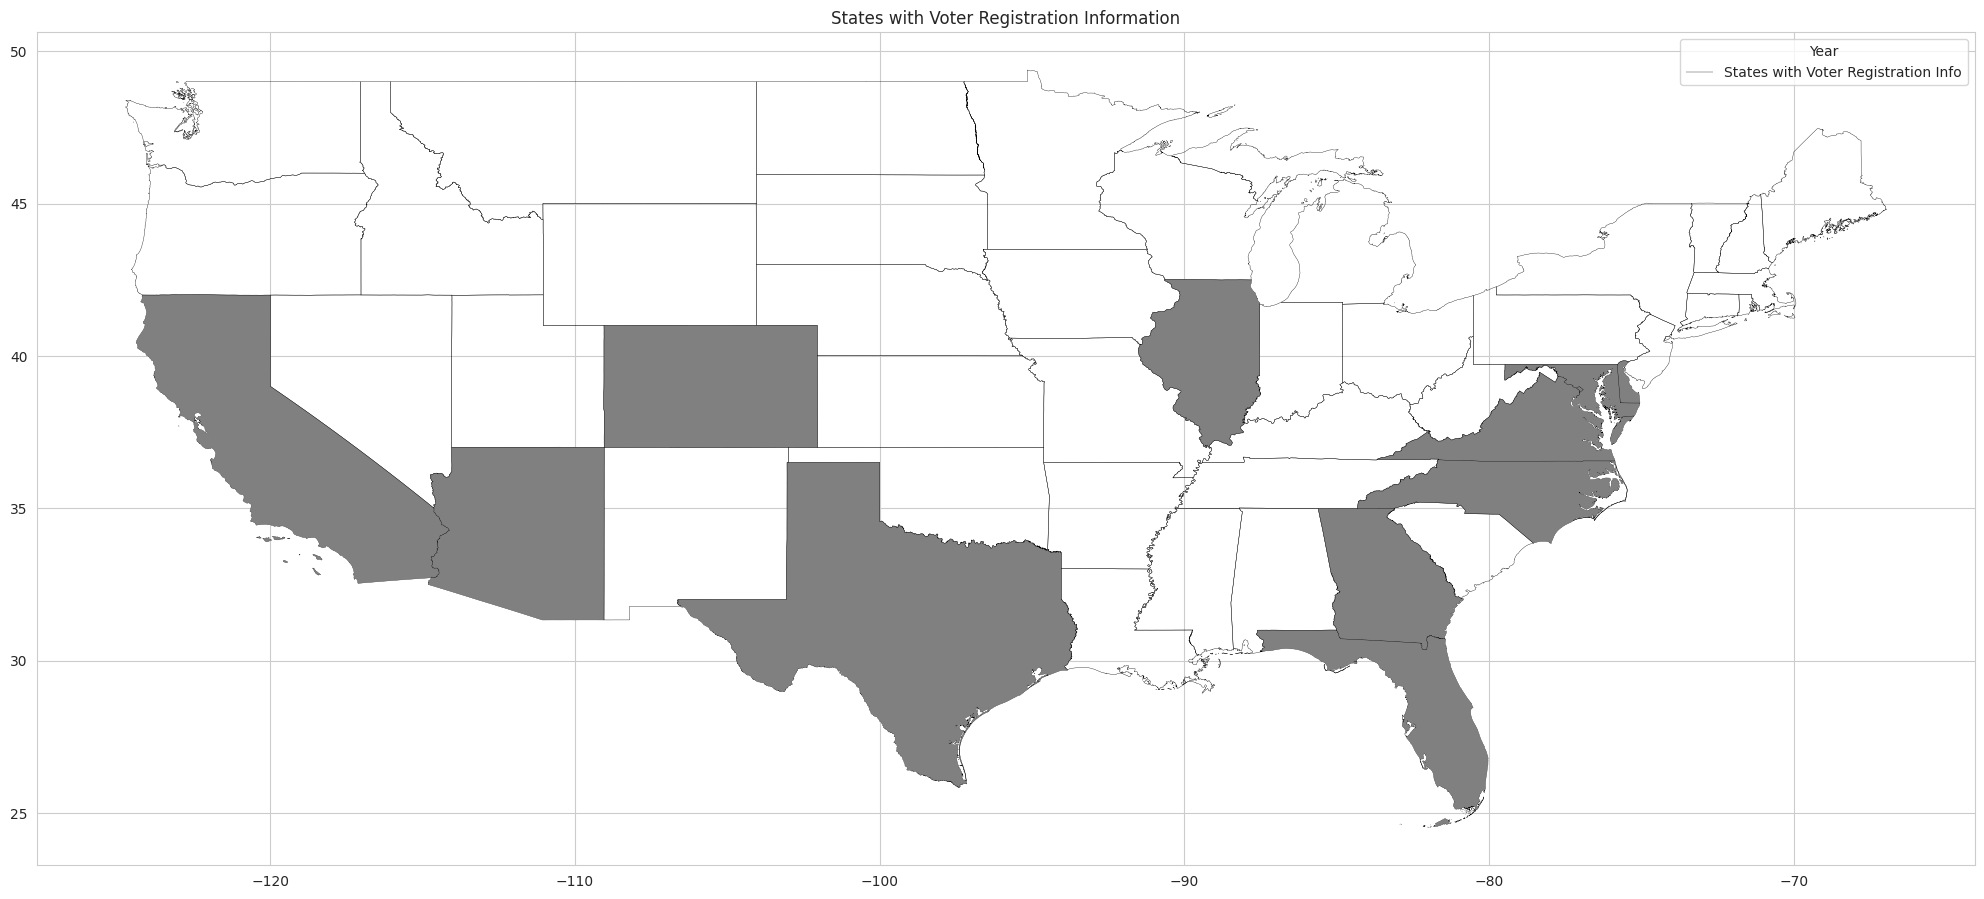

In [138]:
bbox = states.cx[minx:maxx, miny:maxy]
us_map = bbox.boundary.plot(figsize=(25,15), linewidth=.25, color="black")
data_states = states[states["STUSPS"].isin(["AZ", "CA", "CO", "DE", "DC", "FL", "GA", "IL", "MD", "NC", "TX", "VA"])]
data_states.plot(ax=us_map,color="grey",linewidth=.25)
plt.title("States with Voter Registration Information")
legend = plt.legend(labels = {"States with Voter Registration Info":"grey"}, title="Year")
plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


In this notebook, it is found that new voter registration was higher for the 2016 than 2020 except for California. It was also found that California and Texas have the highest newly registered voters. This outcome correlates with the fact that California and Texas are two of the largest states in the country.

A suggestion that would be revelant to this data set would be to show the percentage of new registered voters. This would be helpful in determining if the number of new registered voters per state is due to the size/population of the state itself. Another suggestion would be to determine which party did each of the new registered voters vote for each year. This could help in showing if the new_registered voters caused changes in election outcome in 2020 as compared to 2016.

One step that would be taken if the project were to be continued to be worked on is to add data for all 50 states. It would be interesting to see if there are any outliers to the common pattern of larger population having more registered voters. It would also be interesting to analyze why certain outliers exist the way they do which could lead to more interesting research questions.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Ashank Karuna